# Default of credit card clients

The goal of the project is to make a profile for the client most likely to default.

first we import the data and look at statistics about the data.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
df = pd.read_excel('default of credit card clients.xls', header=1)
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


## data preprocessing

Here we prepare the data for the analysis by mapping categories and changing the column names to ones that better fit the analysis.

In [5]:
df['SEX'] = df['SEX'].map({1:'Male',2:"Female"})
df['EDUCATION'] = df['EDUCATION'].map({1:"Graduate school", 2:'University', 3:'High school', 4:'Other', 5:'Other', 6:'Other', 0:'Other'})
df['MARRIAGE'] = df['MARRIAGE'].map({0:'Single', 1:'Married', 2:'Single', 3:'Other'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [6]:
df = df.rename(columns={'default payment next month':'DEFAULT', 'PAY_0':'PAY_1'})
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000,Female,University,Married,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,Female,University,Single,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,Female,University,Single,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,Female,University,Married,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,Male,University,Married,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


## Univariate analysis

We explore at each variable in the dataset separately.

<AxesSubplot:xlabel='DEFAULT', ylabel='count'>

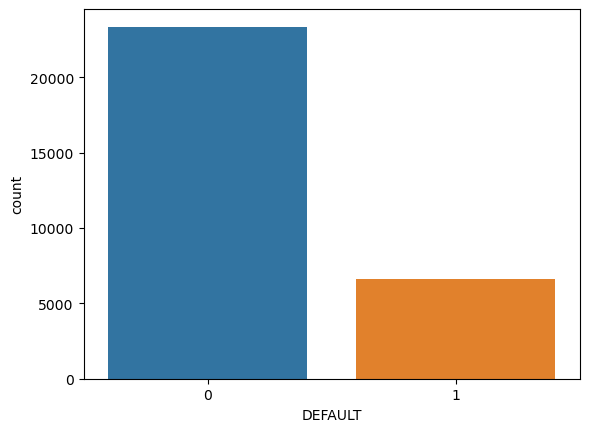

In [7]:
sns.countplot(df,x='DEFAULT')

<AxesSubplot:xlabel='SEX', ylabel='count'>

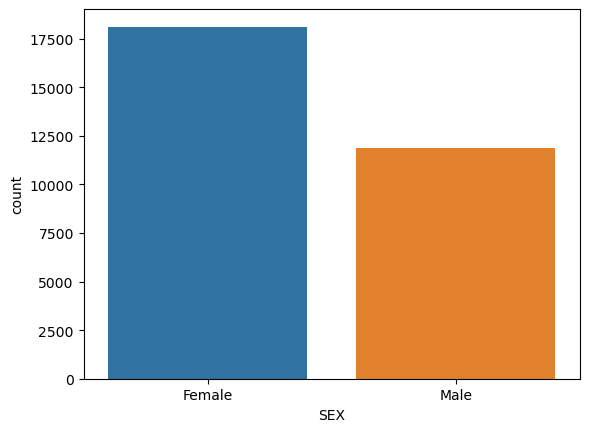

In [8]:
sns.countplot(df,x='SEX')

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

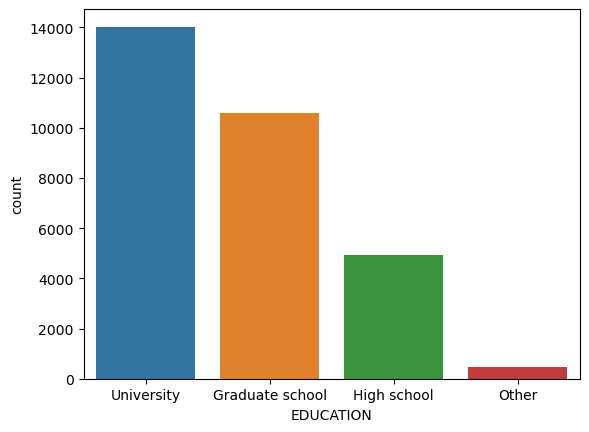

In [9]:
sns.countplot(df,x='EDUCATION')

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

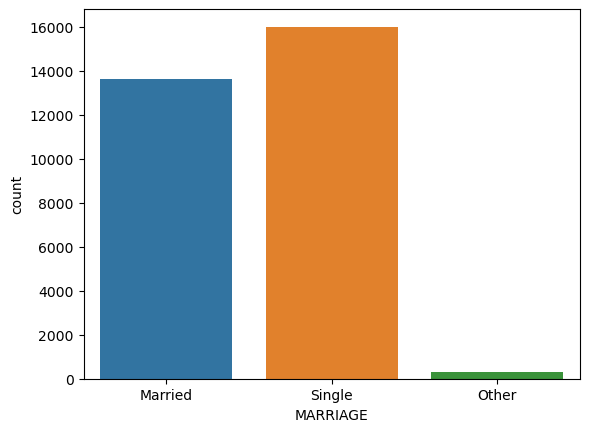

In [10]:
sns.countplot(df,x='MARRIAGE')

## Bivariate analysis

We look at each variable and how it relates to the default status.

<AxesSubplot:xlabel='SEX', ylabel='count'>

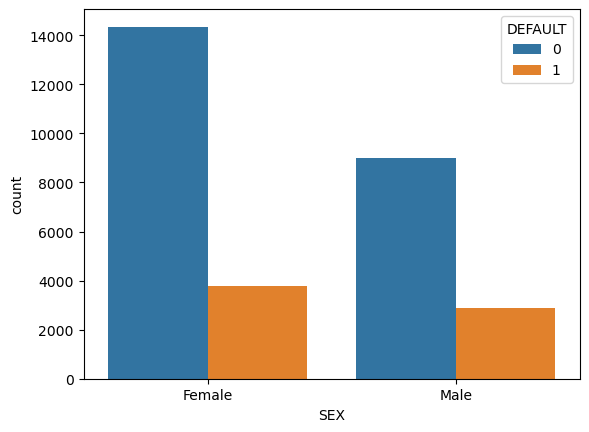

In [11]:
sns.countplot(df,x='SEX',hue='DEFAULT')

In [12]:
pd.crosstab(df.SEX,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
SEX,,
Female,0.792237,0.207763
Male,0.758328,0.241672
All,0.778800,0.221200


From the graph above we see that more women defaulted on their loans but when we look at table we see that men are more likely to default.

<AxesSubplot:xlabel='EDUCATION', ylabel='count'>

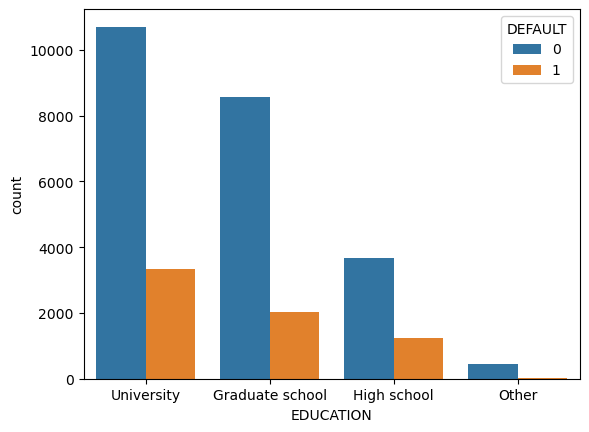

In [13]:
sns.countplot(df,x='EDUCATION',hue='DEFAULT')

In [14]:
pd.crosstab(df.EDUCATION,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
EDUCATION,,
Graduate school,0.807652,0.192348
High school,0.748424,0.251576
Other,0.929487,0.070513
University,0.762651,0.237349
All,0.778800,0.221200


More university grads defaulted on the loans, but high school grads are more likely to default.

<AxesSubplot:xlabel='MARRIAGE', ylabel='count'>

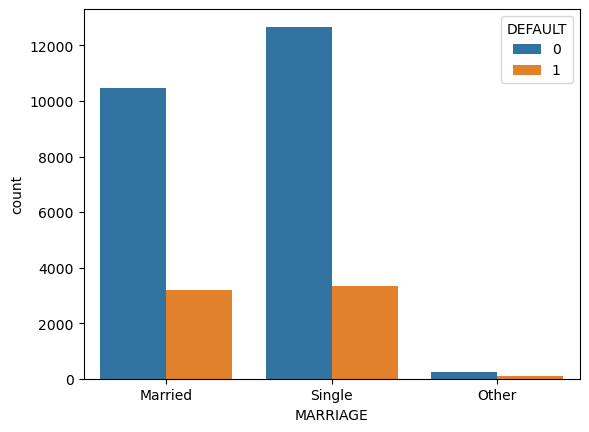

In [15]:
sns.countplot(df,x='MARRIAGE',hue='DEFAULT')

In [16]:
pd.crosstab(df.MARRIAGE,df.DEFAULT,normalize='index',margins=True)

DEFAULT,0,1
MARRIAGE,,
Married,0.765283,0.234717
Other,0.739938,0.260062
Single,0.791110,0.208890
All,0.778800,0.221200


Single people default more but people with marriage status of other are more likely to default.

<AxesSubplot:xlabel='AGE', ylabel='Count'>

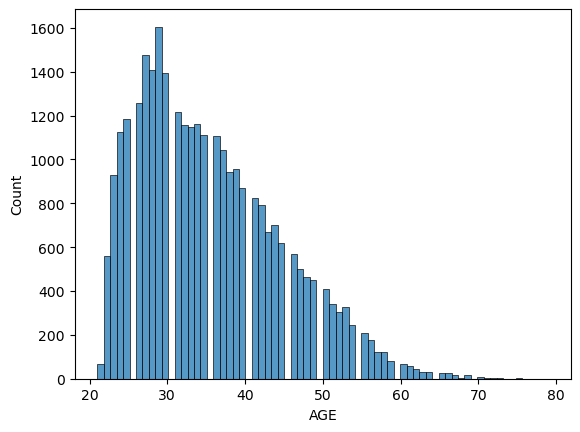

In [17]:
sns.histplot(df, x='AGE')

<AxesSubplot:xlabel='AGE', ylabel='Count'>

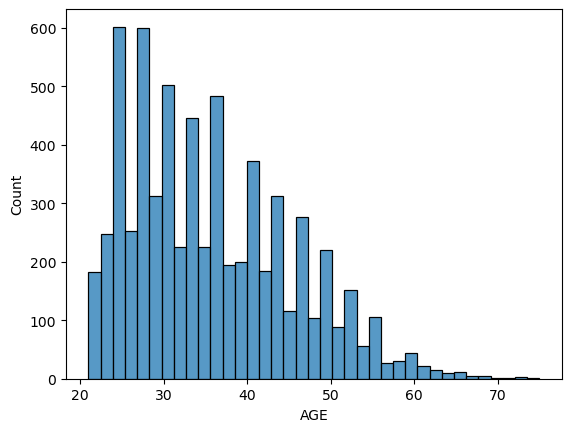

In [18]:
sns.histplot(df[df.DEFAULT == 1], x='AGE')

In [19]:
pd.crosstab(df.AGE,df.DEFAULT,normalize='index', margins=True)

DEFAULT,0,1
AGE,,
21,0.791045,0.208955
22,0.698214,0.301786
23,0.734694,0.265306
24,0.733807,0.266193
25,0.745363,0.254637
26,0.798567,0.201433
27,0.788084,0.211916
28,0.797019,0.202981
29,0.804984,0.195016


In [20]:
age = df[['AGE','DEFAULT']]
de = age[age.DEFAULT == 1].groupby('AGE').count()
nd = age[age.DEFAULT == 0].groupby('AGE').count()
counts = de.merge(nd,how='left',on='AGE')
counts['p1'] = counts.DEFAULT_x/(counts.DEFAULT_x+counts.DEFAULT_y)
counts['p0'] = counts.DEFAULT_y/(counts.DEFAULT_x+counts.DEFAULT_y)
s = pd.Series(range(len(counts)))
counts['age'] = counts.index
counts.set_index(s)

,DEFAULT_x,DEFAULT_y,p1,p0,age
0,14,53,0.208955,0.791045,21
1,169,391,0.301786,0.698214,22
2,247,684,0.265306,0.734694,23
3,300,827,0.266193,0.733807,24
4,302,884,0.254637,0.745363,25
5,253,1003,0.201433,0.798567,26
6,313,1164,0.211916,0.788084,27
7,286,1123,0.202981,0.797019,28
8,313,1292,0.195016,0.804984,29
9,274,1121,0.196416,0.803584,30


<AxesSubplot:xlabel='age', ylabel='p1'>

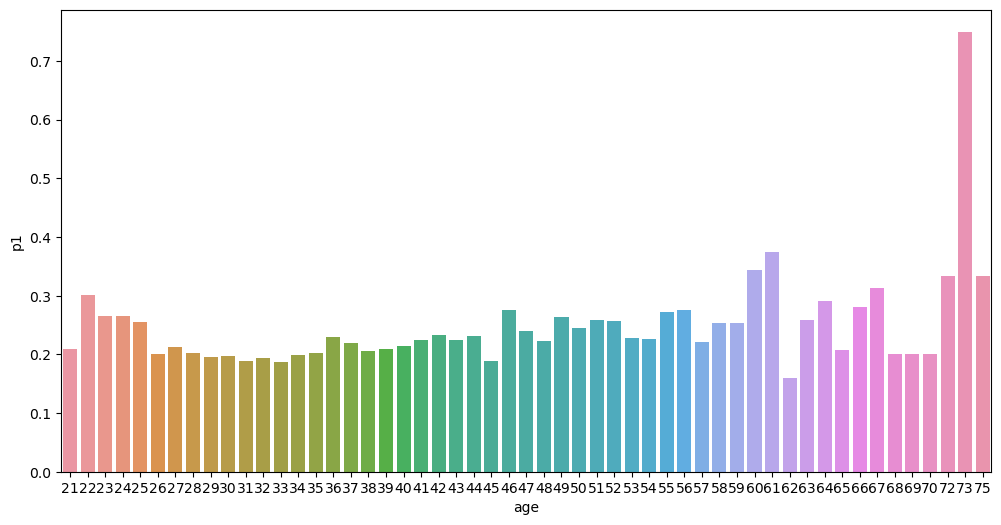

In [21]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(counts,x='age',y='p1',ax=ax)

When we look at who is more likely to default, we see that the likely hood of default is higher in the age segments above 59 and lower than 26. We have a small amount of data on the age segment above 59, small data samples are susceptible to more extreme distributions which could explain the increase in likelihood.

## Hypothesis test

In the previous plot the likelihood of default is higher in the age segments younger than 26 and higher than 59. We need to perform a hypothesis test to evaluate whether the higher likelihood is statistically significant.

In [22]:
population = pd.crosstab(index=df.DEFAULT,columns='count')
sample = pd.crosstab(index=df[df.AGE < 26].DEFAULT,columns='count')
obsurved = sample
population_ratios = population/len(df.DEFAULT)
expected = population_ratios*len(df[df.AGE < 26].DEFAULT)
print(stats.chisquare(f_obs=obsurved,f_exp=expected))

Power_divergenceResult(statistic=array([46.3106958]), pvalue=array([1.0091159e-11]))


In [23]:
population = pd.crosstab(index=df.DEFAULT,columns='count')
sample = pd.crosstab(index=df[df.AGE > 60].DEFAULT,columns='count')
obsurved = sample
population_ratios = population/len(df.DEFAULT)
expected = population_ratios*len(df[df.AGE > 60].DEFAULT)
print(stats.chisquare(f_obs=obsurved,f_exp=expected))

Power_divergenceResult(statistic=array([3.51493282]), pvalue=array([0.06081812]))


Using the chai square test to confirm our findings, we conclude that the increase in defaults in the age segment younger than 26 is significant while in the age segment older than 59 it isn’t significant and it’s probably due to the smaller sample size.

In [24]:
population = pd.crosstab(index=df.DEFAULT,columns='count')
sample = pd.crosstab(index=df[df.MARRIAGE == 'Other'].DEFAULT,columns='count')
obsurved = sample
population_ratios = population/len(df.DEFAULT)
expected = population_ratios*len(df[df.MARRIAGE == 'Other'].DEFAULT)
print(stats.chisquare(f_obs=obsurved,f_exp=expected))

Power_divergenceResult(statistic=array([2.83165248]), pvalue=array([0.09242322]))


Performing a significance test on of the marriage status resulted in finding  that the other category having a higher default rate is not significant.

## Conclusion

So far, we determined that the costumers who are most likely to default are male younger than 26 with a high school degree.

In [25]:
df[(df.AGE < 26) & (df.SEX == 'Male') & (df.EDUCATION == 'High school')].DEFAULT.value_counts(normalize=True)

0    0.68125
1    0.31875
Name: DEFAULT, dtype: float64

In [26]:
df.DEFAULT.value_counts(normalize=True)

0    0.7788
1    0.2212
Name: DEFAULT, dtype: float64

The likelihood of default in the costumers that fit the profile is 9.75% higher than the rest.